<a href="https://colab.research.google.com/github/Farisi001/Hamoye/blob/master/Hamoye_stage_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from fbprophet import Prophet

In [63]:
df = pd.read_csv('household_power_consumption.txt', sep = ';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'],na_values = '?', dtype = float)

In [64]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [65]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


In [66]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [67]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [43]:
# add a column for for the remainder of sub metering
values = df.values.astype('float32')
df['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

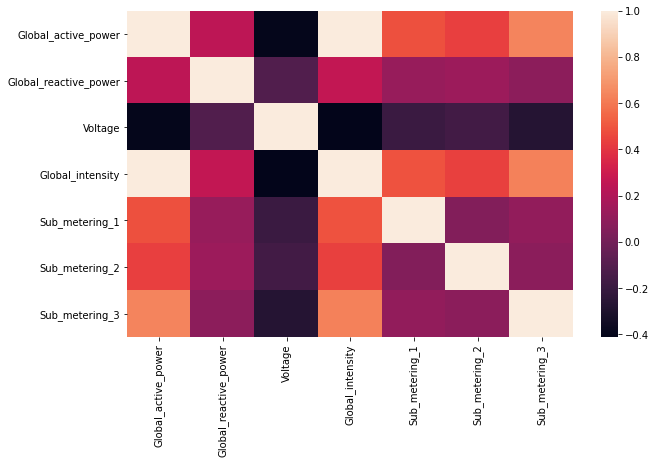

In [68]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())

In [69]:
df.fillna(df.mean(), inplace=True)

In [70]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [71]:
df.index

DatetimeIndex(['2006-12-16 17:24:00', '2006-12-16 17:25:00',
               '2006-12-16 17:26:00', '2006-12-16 17:27:00',
               '2006-12-16 17:28:00', '2006-12-16 17:29:00',
               '2006-12-16 17:30:00', '2006-12-16 17:31:00',
               '2006-12-16 17:32:00', '2006-12-16 17:33:00',
               ...
               '2010-11-26 20:53:00', '2010-11-26 20:54:00',
               '2010-11-26 20:55:00', '2010-11-26 20:56:00',
               '2010-11-26 20:57:00', '2010-11-26 20:58:00',
               '2010-11-26 20:59:00', '2010-11-26 21:00:00',
               '2010-11-26 21:01:00', '2010-11-26 21:02:00'],
              dtype='datetime64[ns]', name='datetime', length=2075259, freq=None)

In [78]:
#Downsample to daily data points
df_daily = df.resample('D').mean()
print(df_daily)

            Global_active_power  ...  Sub_metering_3
datetime                         ...                
2006-12-16             3.053475  ...       12.439394
2006-12-17             2.354486  ...        9.264583
2006-12-18             1.530435  ...        9.734722
2006-12-19             1.157079  ...        4.303472
2006-12-20             1.545658  ...        9.765972
...                         ...  ...             ...
2010-11-22             1.417733  ...        7.038889
2010-11-23             1.095511  ...        5.285417
2010-11-24             1.247394  ...        8.488889
2010-11-25             0.993864  ...        3.522222
2010-11-26             1.178230  ...        7.908947

[1442 rows x 7 columns]


In [79]:
# downsampling to monthly data points
df_monthly = df.resample('M').mean()
print(df_monthly)

            Global_active_power  ...  Sub_metering_3
datetime                         ...                
2006-12-31             1.901148  ...        7.409385
2007-01-31             1.546014  ...        7.383309
2007-02-28             1.401068  ...        6.703545
2007-03-31             1.318622  ...        6.504647
2007-04-30             0.908462  ...        4.943236
2007-05-31             0.985862  ...        5.139964
2007-06-30             0.827078  ...        4.377979
2007-07-31             0.668612  ...        3.487031
2007-08-31             0.764348  ...        5.053407
2007-09-30             0.969324  ...        5.240461
2007-10-31             1.103910  ...        5.736848
2007-11-30             1.294464  ...        6.937568
2007-12-31             1.626462  ...        8.118939
2008-01-31             1.459912  ...        6.993312
2008-02-29             1.181378  ...        6.128769
2008-03-31             1.245333  ...        6.265154
2008-04-30             1.115972  ...        6.

Text(0.5, 1.0, 'Downsampled Data')

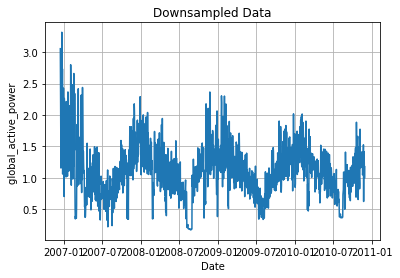

In [83]:
plt.plot(df_daily.index, df_daily.Global_active_power)
plt.grid()
plt.xlabel('Date')
plt.ylabel('global_active_power ')
plt.title('Downsampled Data')

In [84]:
df_daily_2 = df_daily.reset_index()
df_daily_2.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
1,2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2,2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
3,2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
4,2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972


In [85]:
df_daily_2 = df_daily_2[['datetime','Global_active_power']]

new_daily_df = df_daily_2.rename(columns={"datetime": "ds", "Global_active_power": "y"})

In [110]:
model = Prophet()
model.fit(new_daily_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [104]:
test_set = new_daily_df[:365]
train_set = new_daily_df[-365:]
x = len(new_daily_df)

In [112]:
#predict for the next 30 days
future = model.make_future_dataframe(periods=20, freq='D') 
forecast = model.predict(future) 
forecast.head(15)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1.234471,1.381073,2.136650,1.234471,1.234471,0.520846,0.520846,0.520846,0.158174,0.158174,0.158174,0.362671,0.362671,0.362671,0.0,0.0,0.0,1.755317
1,2006-12-17,1.233609,1.369263,2.089680,1.233609,1.233609,0.495576,0.495576,0.495576,0.124488,0.124488,0.124488,0.371089,0.371089,0.371089,0.0,0.0,0.0,1.729185
2,2006-12-18,1.232747,1.154381,1.885692,1.232747,1.232747,0.286956,0.286956,0.286956,-0.092324,-0.092324,-0.092324,0.379280,0.379280,0.379280,0.0,0.0,0.0,1.519703
3,2006-12-19,1.231885,1.233627,1.946648,1.231885,1.231885,0.364323,0.364323,0.364323,-0.022686,-0.022686,-0.022686,0.387009,0.387009,0.387009,0.0,0.0,0.0,1.596209
4,2006-12-20,1.231023,1.233661,1.991428,1.231023,1.231023,0.384218,0.384218,0.384218,-0.009827,-0.009827,-0.009827,0.394045,0.394045,0.394045,0.0,0.0,0.0,1.615241
5,2006-12-21,1.230161,1.156041,1.898251,1.230161,1.230161,0.290887,0.290887,0.290887,-0.109284,-0.109284,-0.109284,0.400171,0.400171,0.400171,0.0,0.0,0.0,1.521048
6,2006-12-22,1.229299,1.250027,1.985754,1.229299,1.229299,0.356651,0.356651,0.356651,-0.048541,-0.048541,-0.048541,0.405193,0.405193,0.405193,0.0,0.0,0.0,1.585951
7,2006-12-23,1.228437,1.428858,2.173294,1.228437,1.228437,0.567117,0.567117,0.567117,0.158174,0.158174,0.158174,0.408943,0.408943,0.408943,0.0,0.0,0.0,1.795554
8,2006-12-24,1.227575,1.414101,2.104908,1.227575,1.227575,0.535774,0.535774,0.535774,0.124488,0.124488,0.124488,0.411287,0.411287,0.411287,0.0,0.0,0.0,1.763349
9,2006-12-25,1.226713,1.159872,1.955088,1.226713,1.226713,0.319803,0.319803,0.319803,-0.092324,-0.092324,-0.092324,0.412127,0.412127,0.412127,0.0,0.0,0.0,1.546516


In [113]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-16,1.755317,1.381073,2.136650,1.234471,1.234471,1.234471
1,2006-12-17,1.729185,1.369263,2.089680,1.233609,1.233609,1.233609
2,2006-12-18,1.519703,1.154381,1.885692,1.232747,1.232747,1.232747
3,2006-12-19,1.596209,1.233627,1.946648,1.231885,1.231885,1.231885
4,2006-12-20,1.615241,1.233661,1.991428,1.231023,1.231023,1.231023
...,...,...,...,...,...,...,...
1457,2010-12-12,1.556062,1.169452,1.906002,1.100232,1.100154,1.100267
1458,2010-12-13,1.346344,0.952655,1.708847,1.100271,1.100171,1.100322
1459,2010-12-14,1.423728,1.057450,1.802614,1.100310,1.100186,1.100377
1460,2010-12-15,1.444789,1.089415,1.842395,1.100350,1.100199,1.100449


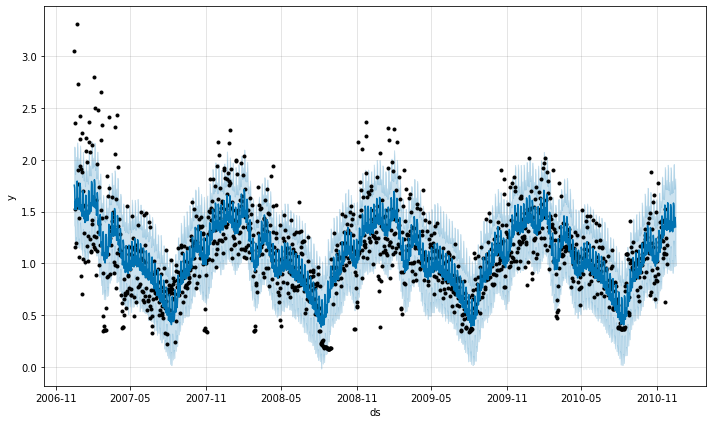

In [114]:
model_2.plot(forecast2)
plt.show()